In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
### drop day,month,year

df=df.drop(['day', 'month', 'year'],axis=1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
### Separate Dependent and Independent feature / dependent feature - FWI and other Independednt feature

X=df.drop(['FWI'],axis=1)
y=df['FWI']



In [13]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [15]:
## train and test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
 97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       0
 141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       1
 192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       1
 68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       0
 119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4        0       0
 14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0        0       0
 92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8        0       0
 179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5        1       1
 102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4        0       0
 
 [182 rows x 11 columns],
      Temperature  RH  W

In [17]:
### Feature selection based on correlation

X_train.corr()



,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

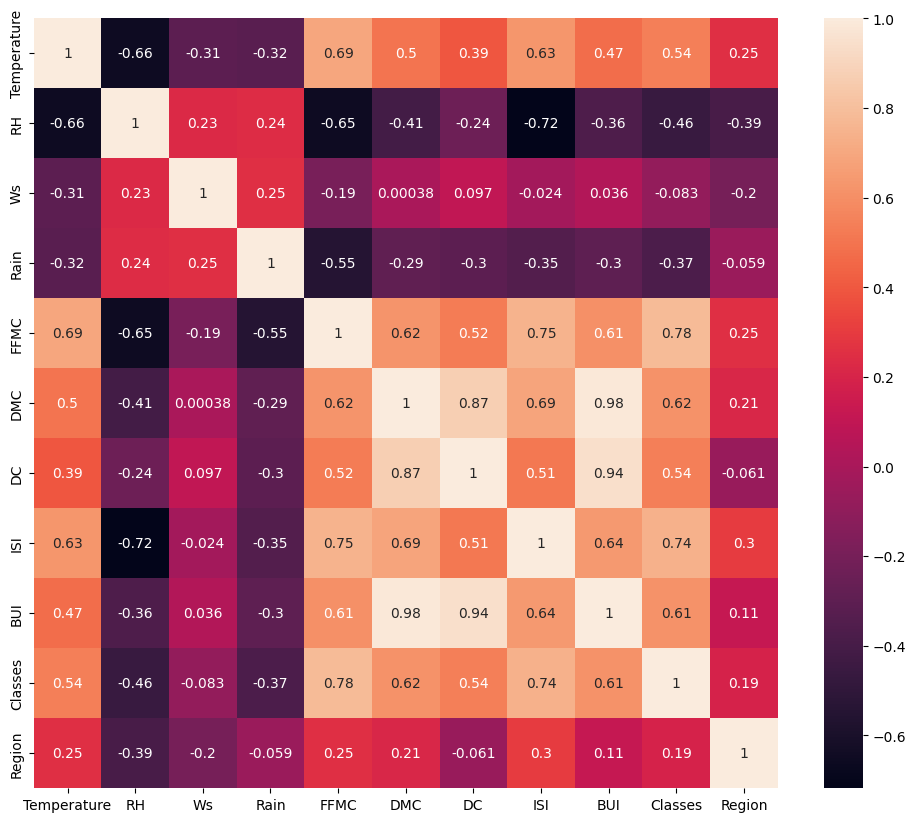

In [18]:
### Check for multicollinearitry
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [19]:
def get_highly_correlated_columns(df, threshold):
    corr_matrix = df.corr().abs()  # Get absolute correlation values
    columns_to_check = corr_matrix.columns
    correlated_columns = set()

    for i in range(len(columns_to_check)):
        for j in range(i + 1, len(columns_to_check)):
            if corr_matrix.iloc[i, j] > threshold:
                correlated_columns.add(columns_to_check[i])
                correlated_columns.add(columns_to_check[j])
    
    return correlated_columns


In [20]:
max_corr_col=get_highly_correlated_columns(X_train,0.85)

In [21]:
X_train.drop(max_corr_col,axis=1,inplace=True)

In [22]:
X_train

,Temperature,RH,Ws,Rain,FFMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,2.1,0,0
141,31,72,14,0.2,60.2,0.8,0,1
192,40,31,15,0.0,94.2,16.6,1,1
68,32,60,18,0.3,77.1,2.2,0,0
119,32,47,14,0.7,77.5,1.8,0,0
...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.2,0,0
14,28,80,17,3.1,49.4,0.4,0,0
92,25,76,17,7.2,46.0,0.2,0,0
179,34,59,16,0.0,88.1,7.4,1,1


In [23]:
X_test.drop(max_corr_col,axis=1,inplace=True)

In [24]:
X_train.shape,X_test.shape

((182, 8), (61, 8))

In [25]:
## Standardization for only independent features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 8))

<Axes: >

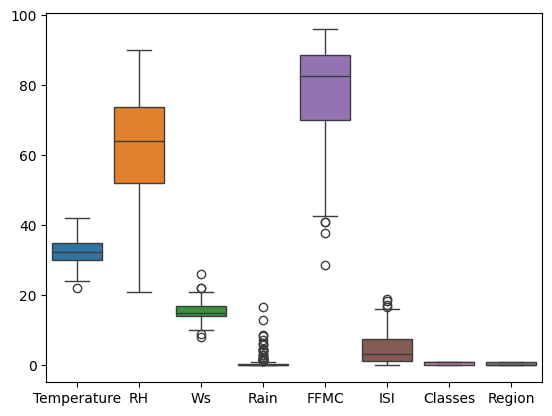

In [27]:
sns.boxplot(X_train)


<Axes: >

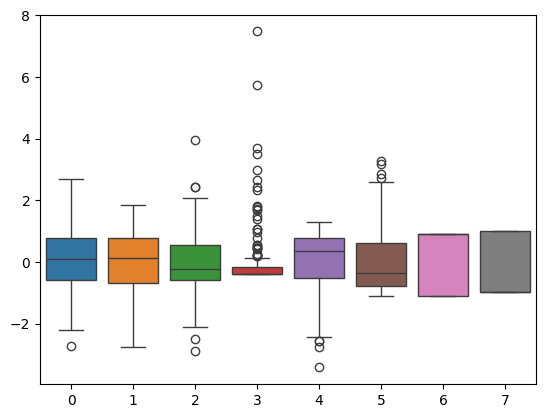

In [28]:
sns.boxplot(X_train_scaled)

In [29]:
## linear Regression

from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [30]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
y_pred=regression.predict(X_test_scaled)

6.110706613626082 1.6603583040730436 2.471984347366723 0.8619378295406555


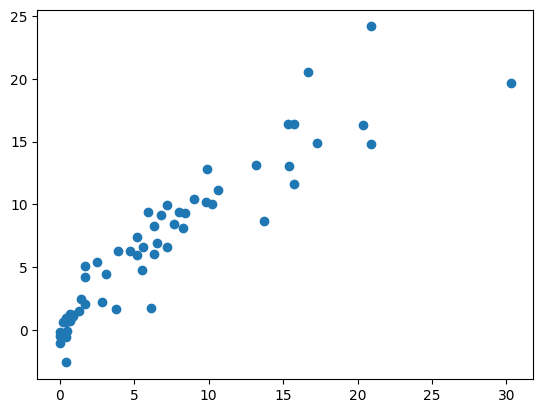

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred)


In [33]:
## lasso regression model
from sklearn.linear_model import Lasso
Lasso_regression=Lasso()


In [34]:
Lasso_regression.fit(X_train_scaled,y_train)

Lasso()

In [35]:
y_pred_lasso=Lasso_regression.predict(X_test_scaled)

7.31336033764957 1.8118111432818882 2.704322528406989 0.8347656882567904


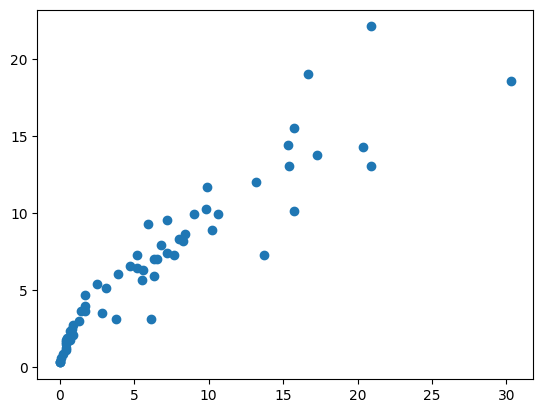

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_lasso)
mae=mean_absolute_error(y_test,y_pred_lasso)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_lasso)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred_lasso)

In [37]:
## ridge regression model

from sklearn.linear_model import Ridge
Ridge_regression=Ridge()


In [38]:
Ridge_regression.fit(X_train_scaled,y_train)

Ridge()

In [39]:
y_pred_Ridge=Ridge_regression.predict(X_test_scaled)

6.17095760237104 1.6703957655223394 2.4841412202954647 0.8605765496094767


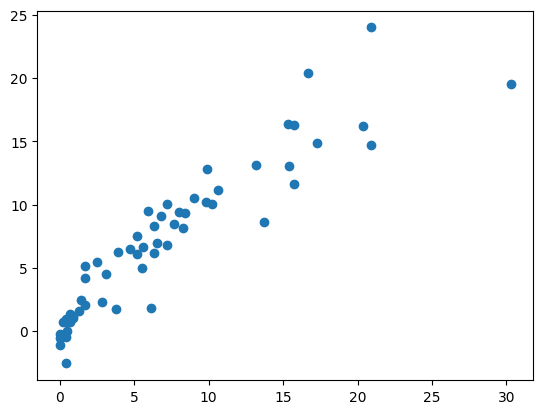

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_Ridge)
mae=mean_absolute_error(y_test,y_pred_Ridge)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_Ridge)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred_Ridge)

12.0139673884163 2.577702088352691 3.466117047708617 0.7285625839450531


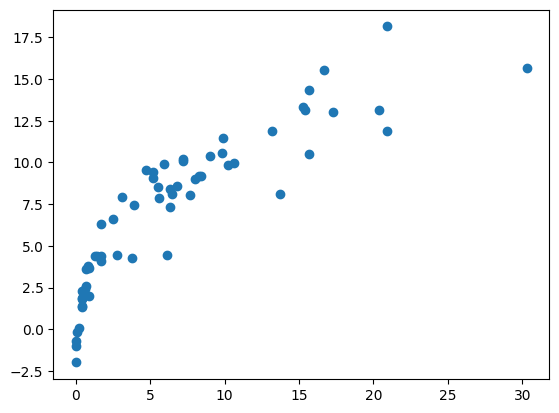

In [41]:
## elasticnet regression
from sklearn.linear_model import ElasticNet
ElasticNetcv_regression=ElasticNet()
ElasticNetcv_regression.fit(X_train_scaled,y_train)
y_pred_elastic_cv=ElasticNetcv_regression.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_elastic_cv)
mae=mean_absolute_error(y_test,y_pred_elastic_cv)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_elastic_cv)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred_elastic_cv)


6.363531015932669 1.6950255400424803 2.522604014888716 0.8562256446928836


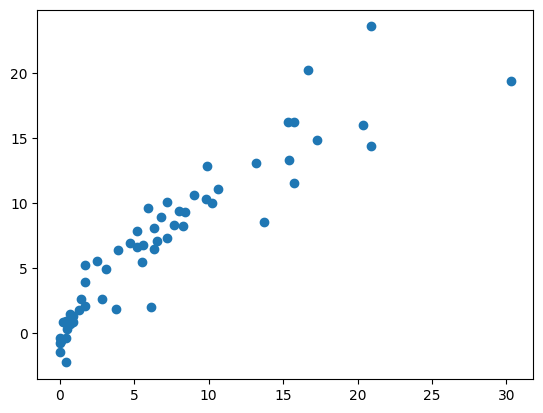

In [42]:
### apply cross validation for lassocv,ridgecv,elasticcv

from sklearn.linear_model import ElasticNetCV
ElasticNetcv_regression=ElasticNetCV()
ElasticNetcv_regression.fit(X_train_scaled,y_train)
y_pred_elastic_cv=ElasticNetcv_regression.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_elastic_cv)
mae=mean_absolute_error(y_test,y_pred_elastic_cv)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_elastic_cv)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred_elastic_cv)



6.105341442836228 1.654289466021366 2.470898913925098 0.8620590474571694


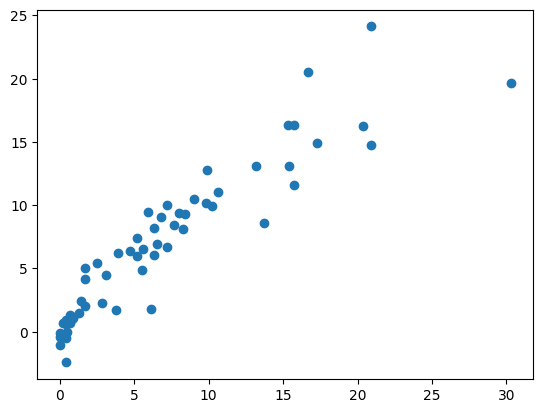

In [43]:
from sklearn.linear_model import LassoCV
ElasticNetcv_regression=LassoCV()
ElasticNetcv_regression.fit(X_train_scaled,y_train)
y_pred_elastic_cv=ElasticNetcv_regression.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_elastic_cv)
mae=mean_absolute_error(y_test,y_pred_elastic_cv)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_elastic_cv)


print(mse,mae,rmse,r2_score)
plt.scatter(y_test,y_pred_elastic_cv)


In [ ]:
ElasticNetcv_regression.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
ElasticNetcv_regression.coef_

array([ 0.39401463,  0.43895923,  0.26146653,  0.        ,  0.08401372,
        6.30469948,  0.88969443, -0.14953888])

In [ ]:
### pickle the machine learning models,preprocessing model standardscaler
scaler

StandardScaler()

In [ ]:
Ridge_regression

Ridge()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge_regression,open('ridge.pkl','wb'))